# Stats 101C Homework 1

## Damien Ha

### October 13, 2023

In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
# set seed so results can be replicated
np.random.seed(42)

In [3]:
# Create the test samples
x_test = 2 * math.pi * np.random.uniform(-1, 1, 50000)
y_test = np.array([math.sin(x_test[i]) + math.cos(x_test[i]) for i in range(50000)])

In [4]:
# Create matrices to store the predictions for testing samples
y_pred = np.zeros([7, 50000])
y_pred_sq = np.zeros([7, 50000])
degrees = range(1, 8)

In [5]:
# Loop through each replication, create training data
for i in range(1000):
    x_train = 2* math.pi * np.random.uniform(-1, 1, 30)
    y_train = np.array([math.sin(x_train[i]) + math.cos(x_train[i]) for i in range(30)]) + np.random.normal(0, 0.5, 30) 
    
    # Loop through polynomials with degree d, transform to polynomial features
    for d in degrees:
        poly_features = PolynomialFeatures(degree = d)
        x_poly_train = poly_features.fit_transform(x_train.reshape(-1, 1))
        x_poly_test = poly_features.fit_transform(x_test.reshape(-1, 1))  
        
        # Fit a linear regression model based on polynomial featurws, calculate predictions and add them to results
        model = LinearRegression()
        model.fit(x_poly_train, y_train)
        y_pred_test = model.predict(x_poly_test)
        y_pred[d-1] = y_pred[d-1] + y_pred_test
        y_pred_sq[d-1] = y_pred_sq[d-1] + y_pred_test**2
        
y_pred = y_pred / 1000
y_pred_sq = y_pred_sq / 1000

In [6]:
bias_squared = []
variance = []

# Calculate bias spquared and variance 
for d in degrees:
    bias_squared.append(sum((y_pred[d-1] - y_test)**2) / 50000)
    variance.append(sum(y_pred_sq[d-1] - y_pred[d-1]**2) / 50000)

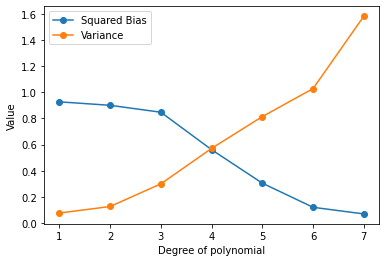

In [7]:
# Plot degree vs value with lines for squared bias and variance
plt.plot(degrees, bias_squared, 'o-', label='Squared Bias')
plt.plot(degrees, variance, 'o-', label='Variance')
plt.legend()
plt.xlabel('Degree of polynomial')
plt.ylabel('Value')
plt.show()

The squared bias has an average downward trend as degree of the polynomial increases, while variance has an average increase. This is as expected, higher degree polynomials can more easily fit to the data and have a lower bias while conversely varying much more. So, at lower polynomial degrees, the model exhibits high bias (underfitting), while at higher degrees, it has high variance (overfitting). The variance line has a bit of an (upward) elbow at degree 6 which suggests that a polynomial of degree 6 might be where the model begins to overfit most severely. The bias and variance lines intersect at 4, which likely is the point where the model is most balanced between underfitting and overfitting. Therefore, this could be a good place to start for future predictions